<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/alzheimer_densenet161.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 22.1MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 1.2MB 52.1MB/s 
     |████████████████████████████████| 194kB 61.1MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 12.8MB 206kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [129]:
from fastai.vision.all import *

In [130]:
path = Path("/content/gdrive/MyDrive/Training")

In [131]:
path.ls()

(#2) [Path('/content/gdrive/MyDrive/Training/AD'),Path('/content/gdrive/MyDrive/Training/CN')]

In [132]:
item_tfms = Resize(128)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [133]:
braindb = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.2, seed = 42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [134]:
dls = braindb.dataloaders(path,bs=32)

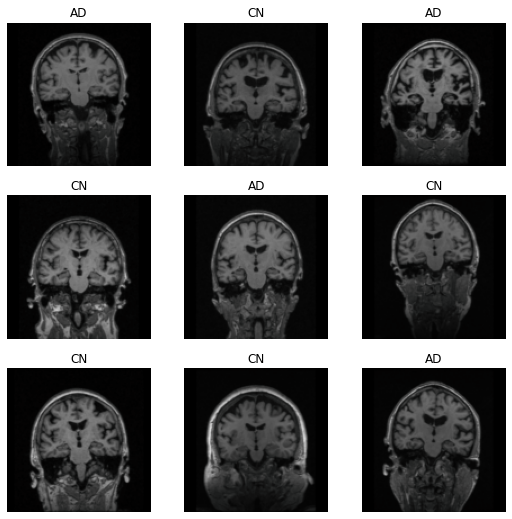

In [135]:
dls.show_batch(max_n=9,unique=False)

In [138]:
learn= cnn_learner(dls,densenet161, pretrained=True, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=0.005248074419796467)

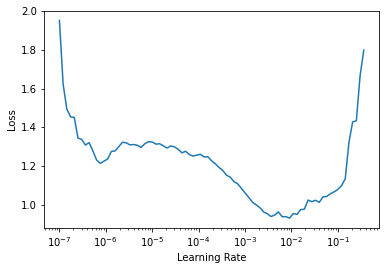

In [139]:
learn.lr_find()

In [140]:
learn.fine_tune(50,1.2e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.438799,1.003371,0.562500,0.437500,00:45


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.062081,1.085762,0.462500,0.537500,00:26
1,1.122444,0.914650,0.512500,0.487500,00:26
2,1.082173,0.849662,0.500000,0.500000,00:26
3,1.025146,0.841064,0.550000,0.450000,00:26
4,0.996303,0.815444,0.550000,0.450000,00:26
5,0.928237,0.801826,0.575000,0.425000,00:26
6,0.850419,0.804770,0.587500,0.412500,00:26
7,0.789107,0.815541,0.562500,0.437500,00:26
8,0.737918,0.830662,0.562500,0.437500,00:26
9,0.683503,0.836840,0.562500,0.437500,00:26
